In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Data Cleaning

##### Importing Data

In [4]:
cars = pd.read_csv(r'G:\Udemy Courses Files\Python Data Analysis Diploma\S18- Preprocessing\preprocessing-materials\datasets\mpg-unclean.csv')
#mpg => Mile Per Gallon

##### Inspecting the Dataframe and Identifying the Inconsistent Data

In [11]:
cars.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0 hp,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0 hp,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0 hp,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0 hp,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0 hp,3449,10.5,70,usa,FORD TORINO
5,15.0,8,429.0,198.0 hp,4341,10.0,70,usa,FORD GALAXIE 500
6,14.0,8,454.0,220.0 hp,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0 hp,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0 hp,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0 hp,3850,8.5,70,usa,amc ambassador dpl


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           329 non-null    float64
 1   cylinders     329 non-null    int64  
 2   displacement  329 non-null    float64
 3   horsepower    329 non-null    object 
 4   weight        329 non-null    int64  
 5   acceleration  329 non-null    float64
 6   model year    329 non-null    int64  
 7   origin        329 non-null    object 
 8   name          329 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 23.3+ KB


In [10]:
cars.describe().round(2)

,mpg,cylinders,displacement,weight,acceleration,model year
count,329.00,329.00,329.00,329.00,329.00,329.0
mean,21.66,5.80,217.00,3229.08,15.40,104.5
std,7.29,1.72,104.72,1376.31,2.92,232.5
min,0.06,4.00,68.00,1800.00,8.00,70.0
25%,16.00,4.00,121.00,2464.00,13.50,73.0
50%,20.20,6.00,200.00,3102.00,15.40,76.0
75%,26.00,8.00,305.00,3821.00,17.00,79.0
max,44.30,8.00,455.00,23000.00,24.80,1973.0


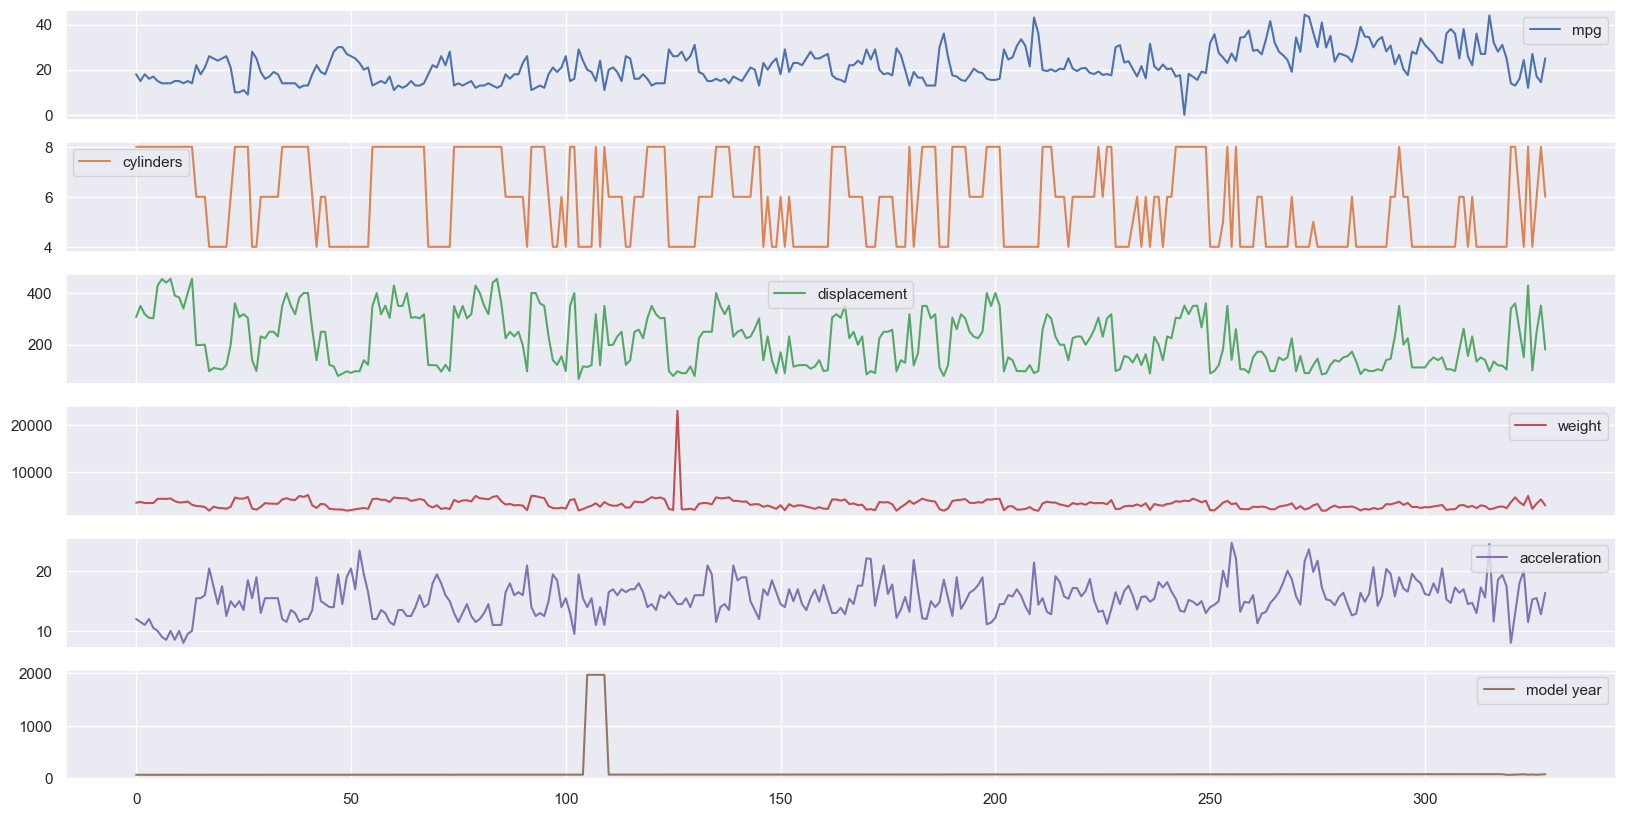

In [19]:
# Finding Outliers
cars.plot(subplots=True, figsize=(20,10))
plt.show()

# => Outliers in mpg(-ve value), Weight, model year

#### Initial Data to be cleaned
- Rename column name (Model Year) to Model_Year
- Outliers in weight, Model Year, mpg
- Inconsistent value in name column (Many Upper / Lower Case Values)
- Inconsistent value in Origin column (United States & usa) 
- Remove 'hp' in horsepower column

##### Q. Identify one column label that should be changed and adjust/rename the column label

In [20]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'name'],
      dtype='object')

In [21]:
cars.rename(columns={'model year':'model_year'}, inplace=True)

In [22]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

##### Have a closer look to the origin column by analyzing the frequency/count of unique values! Can you find any inconsistency?

In [25]:
cars['origin'].value_counts()

origin
usa              254
europe            72
United States      3
Name: count, dtype: int64

##### Replace the value "United States" in the origin column! Save the changes

In [37]:
cars['origin'].replace('United States', 'usa', inplace=True)

In [38]:
cars['origin'].value_counts()

origin
usa       257
europe     72
Name: count, dtype: int64

##### Inspect and identify the problem in the column horsepower

In [47]:
cars['horsepower']

0      130.0 hp
1      165.0 hp
2      150.0 hp
3      150.0 hp
4      140.0 hp
         ...   
324    198.0 hp
325     83.0 hp
326    100.0 hp
327    152.0 hp
328    110.0 hp
Name: horsepower, Length: 329, dtype: object

In [51]:
cars['horsepower'] = cars['horsepower'].str.replace(' hp', '')

In [53]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,FORD TORINO
...,...,...,...,...,...,...,...,...,...
324,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham
325,27.0,4,101.0,83.0,2202,15.3,76,europe,renault 12tl
326,17.0,6,250.0,100.0,3329,15.5,71,usa,chevrolet chevelle malibu
327,14.5,8,351.0,152.0,4215,12.8,76,usa,ford gran torino


##### Convert the datatype in the column horsepower! Overwrite the column!

In [58]:
cars['horsepower'].astype('float')

ValueError: could not convert string to float: 'Not available'

In [61]:
cars['horsepower'].str.findall('Not available').sum()

['Not available',
 'Not available',
 'Not available',
 'Not available',
 'Not available',
 'Not available']

In [63]:
cars['horsepower'] = cars['horsepower'].replace('Not available', np.nan)

In [70]:
cars['horsepower'] = cars['horsepower'].astype('float')

In [71]:
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

##### The Name Column

In [79]:
cars['name'] = cars['name'].str.lower().str.strip()

In [80]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
324,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham
325,27.0,4,101.0,83.0,2202,15.3,76,europe,renault 12tl
326,17.0,6,250.0,100.0,3329,15.5,71,usa,chevrolet chevelle malibu
327,14.5,8,351.0,152.0,4215,12.8,76,usa,ford gran torino


##### Q. Inspect the column model_year in more details by analyzing the frequency/counts of unique values! 

In [82]:
cars['model_year'].max()

1973

In [83]:
cars['model_year'].min()

70

In [85]:
cars['model_year'].value_counts()

model_year
73      33
76      32
70      29
78      28
79      27
75      26
71      25
72      23
82      23
74      22
77      22
80      17
81      17
1973     5
Name: count, dtype: int64

In [86]:
cars['model_year'].replace(1973,73, inplace=True)

In [87]:
cars['model_year'].value_counts()

model_year
73    38
76    32
70    29
78    28
79    27
75    26
71    25
72    23
82    23
74    22
77    22
80    17
81    17
Name: count, dtype: int64

In [93]:
cars.describe().round(2)
# Now max model_year is 82 instead of 1973

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,329.00,329.00,329.00,323.00,329.00,329.00,329.00
mean,21.66,5.80,217.00,111.19,3229.08,15.40,75.62
std,7.29,1.72,104.72,39.85,1376.31,2.92,3.64
min,0.06,4.00,68.00,46.00,1800.00,8.00,70.00
25%,16.00,4.00,121.00,83.50,2464.00,13.50,73.00
50%,20.20,6.00,200.00,100.00,3102.00,15.40,76.00
75%,26.00,8.00,305.00,141.00,3821.00,17.00,79.00
max,44.30,8.00,455.00,230.00,23000.00,24.80,82.00


##### Inspect the column Weight by sorting the values from high to low. Can you see the extreme value?

In [91]:
cars['weight'].sort_values(ascending=False)

126    23000
40      5140
92      4997
38      4955
79      4952
       ...  
17      1835
49      1834
188     1825
177     1825
210     1800
Name: weight, Length: 329, dtype: int64

In [100]:
cars['weight'].values

# CHECK: Miss-typing => 23000 instead of 2300

array([ 3504,  3693,  3436,  3433,  3449,  4341,  4354,  4312,  4425,
        3850,  3563,  3609,  3761,  3086,  2833,  2774,  2587,  1835,
        2672,  2430,  2375,  2234,  2648,  4615,  4376,  4382,  4732,
        2264,  2046,  2634,  3439,  3329,  3302,  3288,  4209,  4464,
        4154,  4096,  4955,  4746,  5140,  2962,  2408,  3282,  3139,
        2220,  2123,  2074,  2065,  1834,  1955,  2126,  2254,  2408,
        2226,  4274,  4385,  4135,  4129,  3672,  4633,  4502,  4456,
        4422,  3892,  4098,  4294,  4077,  2933,  2511,  2979,  2189,
        2395,  2164,  4100,  3672,  3988,  4042,  3777,  4952,  4464,
        4363,  4237,  4735,  4951,  3821,  3121,  3278,  2945,  3021,
        2904,  1950,  4997,  4906,  4654,  4499,  2789,  2401,  2310,
        2472,  2265,  4082,  4278,  1867,  2158,  2582,  2868,  3399,
        2660,  3664,  3102,  2875,  2901,  3336,  2451,  2542,  3781,
        3632,  3613,  4141,  4699,  4457,  4638,  4257,  2219,  1963,
       23000,  2125,

In [98]:
# Return index of max value
cars['weight'].idxmax()

126

In [97]:
# The record in which max value of weight exists
cars.loc[cars['weight'].idxmax()]

mpg                   26.0
cylinders                4
displacement          97.0
horsepower            78.0
weight               23000
acceleration          14.5
model_year              74
origin              europe
name            opel manta
Name: 126, dtype: object

In [109]:
# change the weight value from 23000 to 2300
cars.loc[cars['weight'].idxmax(), 'weight'] = 2300

In [110]:
cars.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,329.00,329.00,329.00,323.00,329.00,329.00,329.00
mean,21.66,5.80,217.00,111.19,3166.16,15.40,75.62
std,7.29,1.72,104.72,39.85,837.34,2.92,3.64
min,0.06,4.00,68.00,46.00,1800.00,8.00,70.00
25%,16.00,4.00,121.00,83.50,2451.00,13.50,73.00
50%,20.20,6.00,200.00,100.00,3086.00,15.40,76.00
75%,26.00,8.00,305.00,141.00,3820.00,17.00,79.00
max,44.30,8.00,455.00,230.00,5140.00,24.80,82.00


<Axes: >

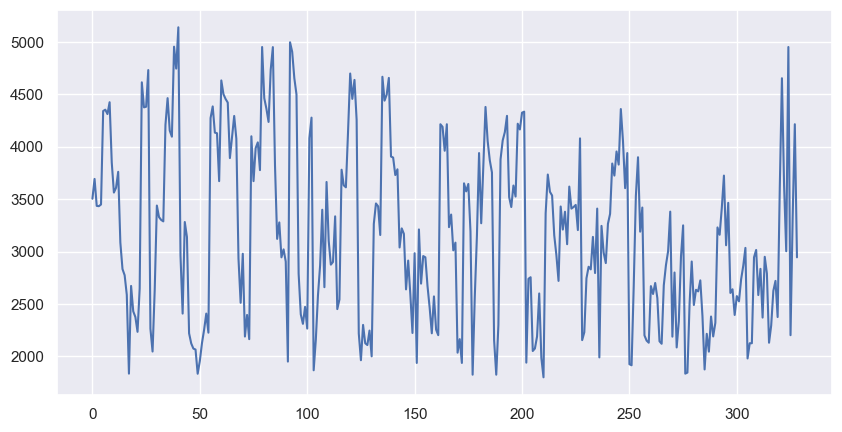

In [113]:
cars.weight.plot(figsize=(10,5))

##### Checking the column mpg too

In [115]:
cars['mpg'].describe()

count    329.000000
mean      21.655199
std        7.294651
min        0.060606
25%       16.000000
50%       20.200000
75%       26.000000
max       44.300000
Name: mpg, dtype: float64

<Axes: >

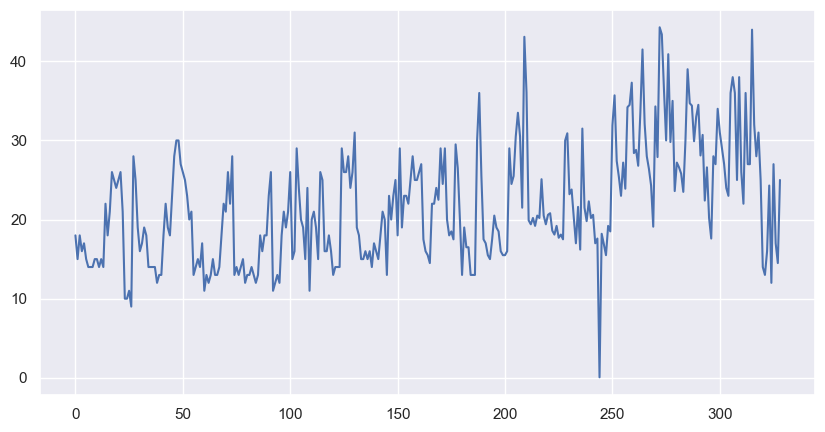

In [116]:
cars['mpg'].plot(figsize=(10,5))

In [118]:
cars['mpg'].values

array([18.        , 15.        , 18.        , 16.        , 17.        ,
       15.        , 14.        , 14.        , 14.        , 15.        ,
       15.        , 14.        , 15.        , 14.        , 22.        ,
       18.        , 21.        , 26.        , 25.        , 24.        ,
       25.        , 26.        , 21.        , 10.        , 10.        ,
       11.        ,  9.        , 28.        , 25.        , 19.        ,
       16.        , 17.        , 19.        , 18.        , 14.        ,
       14.        , 14.        , 14.        , 12.        , 13.        ,
       13.        , 18.        , 22.        , 19.        , 18.        ,
       23.        , 28.        , 30.        , 30.        , 27.        ,
       26.        , 25.        , 23.        , 20.        , 21.        ,
       13.        , 14.        , 15.        , 14.        , 17.        ,
       11.        , 13.        , 12.        , 13.        , 15.        ,
       13.        , 13.        , 14.        , 18.        , 22.  

In [121]:
cars['mpg'].min()

0.0606060606060606

In [122]:
cars['mpg'].max()

44.3

In [123]:
cars.loc[cars['mpg'].idxmin()]

mpg                          0.060606
cylinders                           8
displacement                    351.0
horsepower                      138.0
weight                           3955
acceleration                     13.2
model_year                         79
origin                            usa
name            mercury grand marquis
Name: 244, dtype: object

In [126]:
cars.loc[cars['mpg'].idxmin(),'mpg'] = 1/ cars.loc[cars['mpg'].idxmin(),'mpg'] 

In [127]:
cars.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,329.00,329.00,329.00,323.00,329.00,329.00,329.00
mean,21.71,5.80,217.00,111.19,3166.16,15.40,75.62
std,7.20,1.72,104.72,39.85,837.34,2.92,3.64
min,9.00,4.00,68.00,46.00,1800.00,8.00,70.00
25%,16.00,4.00,121.00,83.50,2451.00,13.50,73.00
50%,20.20,6.00,200.00,100.00,3086.00,15.40,76.00
75%,26.00,8.00,305.00,141.00,3820.00,17.00,79.00
max,44.30,8.00,455.00,230.00,5140.00,24.80,82.00


### Dealing with Missing Data

##### Select all rows with at least one missing / NA Value!

In [129]:
cars.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [131]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [133]:
cars.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [138]:
cars[cars['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
111,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
276,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
279,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
290,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
304,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [139]:
cars.dropna(subset=['horsepower'], inplace=True)

In [140]:
cars.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### Dealing with Duplicated Data

##### Finding the duplicated records in column names

In [147]:
cars.duplicated().value_counts()

False    313
True      10
Name: count, dtype: int64

In [151]:
cars[cars.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
319,25.0,4,104.0,95.0,2375,17.5,70,europe,saab 99e
320,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
321,13.0,8,360.0,170.0,4654,13.0,73,usa,plymouth custom suburb
322,16.0,6,258.0,110.0,3632,18.0,74,usa,amc matador
323,24.3,4,151.0,90.0,3003,20.1,80,usa,amc concord
324,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham
325,27.0,4,101.0,83.0,2202,15.3,76,europe,renault 12tl
326,17.0,6,250.0,100.0,3329,15.5,71,usa,chevrolet chevelle malibu
327,14.5,8,351.0,152.0,4215,12.8,76,usa,ford gran torino
328,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited


In [153]:
cars.drop_duplicates(inplace=True)

In [155]:
cars.duplicated().value_counts()

False    313
Name: count, dtype: int64

In [156]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
314,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
315,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
316,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
317,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#### ** It's a good practice to save the cleaned version of your dataset again

In [158]:
#save the cleaned data
cars.to_csv(r'G:\Udemy Courses Files\Python Data Analysis Diploma\S18- Preprocessing\preprocessing-materials\Exercises\mpg-cleaned.csv', index=False)